In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Show the Numbers of Rows for each sample size
def show_sample_size_rows_count(experiment_dataset):
    # Extract unique sample sizes and count rows
    sample_size_counts = experiment_dataset['Sample Size'].value_counts().sort_index()

    # Create a new DataFrame with the results
    new_df = pd.DataFrame({
        'Sample Size': sample_size_counts.index,
        'Number of Rows': sample_size_counts.values
    })

    # Sort by Sample Size
    new_df = new_df.sort_values('Sample Size')
    return new_df

In [29]:
experiment_dataset = pd.read_csv('Experiment_3_data.csv')

In [30]:
sample_size_count = show_sample_size_rows_count(experiment_dataset)
sample_size_count

,Sample Size,Number of Rows
0,100,4000
1,200,6000
2,500,4050
3,1000,4000
4,2000,4000
5,5000,4000
6,10000,5476
7,12000,300
8,20000,4050
9,33600,300


Remove the sample size that contains too few elements...

In [31]:
sample_sizes_to_remove = [12000, 33600, 40000, 48000, 55000, 66000, 80000, 120000]
experiment_dataset = experiment_dataset[~experiment_dataset['Sample Size'].isin(sample_sizes_to_remove)]

Make sure that there is a maximum of 4.000 rows for each sample size

In [32]:
# Sort the dataframe by column_x and any other columns you want to prioritize
# This ensures consistent results and allows you to control which rows are kept
df_sorted = experiment_dataset.sort_values(by=['Sample Size'])
    
# Group by column_x and keep the first n_rows for each group
df_filtered = df_sorted.groupby('Sample Size').head(4000)
    
# Reset the index of the resulting dataframe
experiment_dataset = df_filtered.reset_index(drop=True)

In [35]:
sample_size_count= show_sample_size_rows_count(experiment_dataset)
sample_size_count

,Sample Size,Number of Rows
0,100,4000
1,200,4000
2,500,4000
3,1000,4000
4,2000,4000
5,5000,4000
6,10000,4000
7,20000,4000
8,50000,4000
9,100000,4000


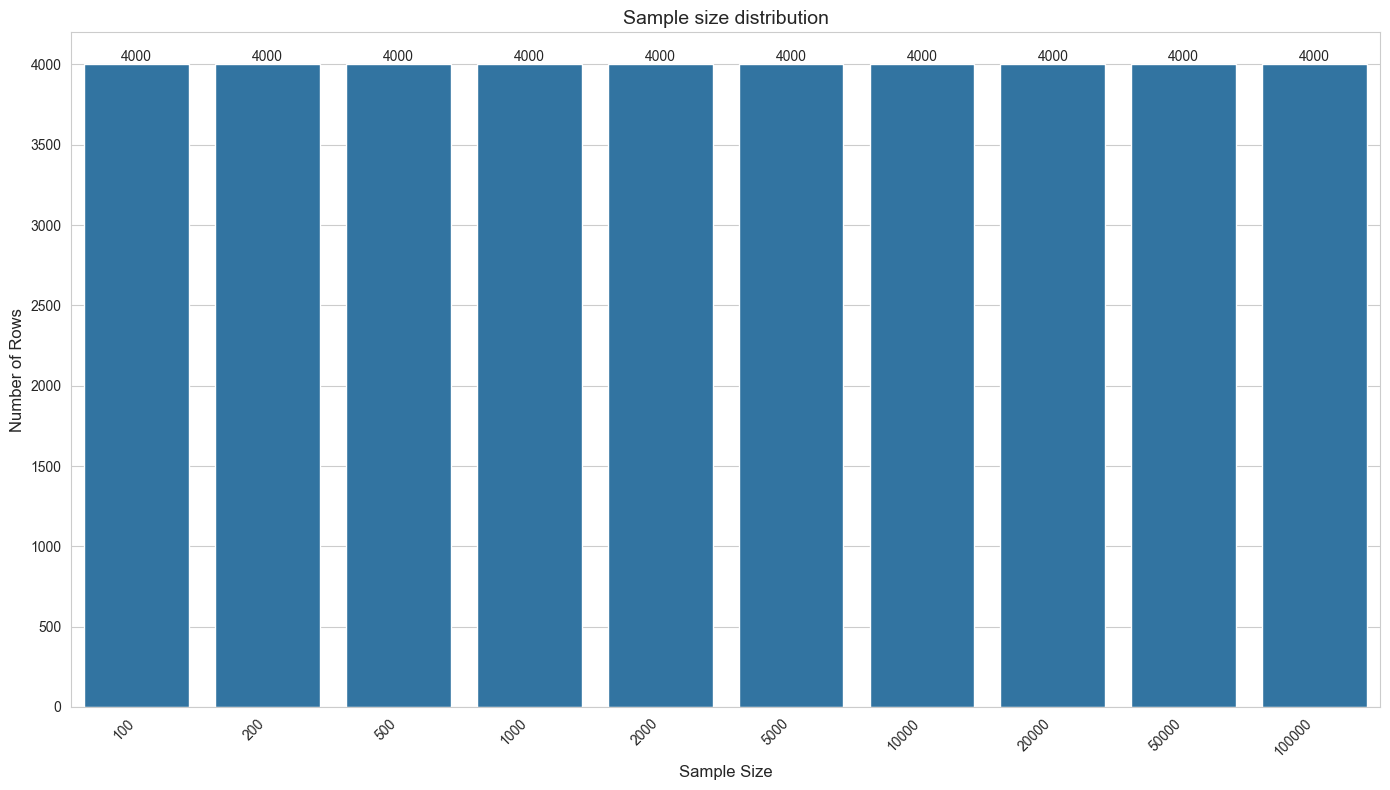

In [36]:
# Set the style for the plot
sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(14, 8))
ax = sns.barplot(data=sample_size_count, x='Sample Size', y='Number of Rows')

# Set labels and title
plt.xlabel('Sample Size', fontsize=12)
plt.ylabel('Number of Rows', fontsize=12)
plt.title('Sample size distribution', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for i, v in enumerate(sample_size_count['Number of Rows']):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Improve layout
plt.tight_layout()
# Show the plot
plt.show()

# Optionally, save the plot as an image file
# plt.savefig('sample_size_vs_rows_histogram.png', dpi=300, bbox_inches='tight')

In [37]:
# Remove features I don't need
experiment_dataset = experiment_dataset.drop(['Top SHAP Features','Model'], axis=1)

In [38]:
# Check for missing values
print("\nMissing values:")
print(experiment_dataset.isnull().sum())


Missing values:
Sample Size              0
R²                       0
MAE                      0
RMSE                     0
Accuracy                 0
MedAE                    0
Max Error                0
RAE                      0
sMAPE                    0
Bias                     0
PICP                     0
CV                       0
Quantile Loss            0
Durbin-Watson            0
SHAP Match Percentage    0
dtype: int64


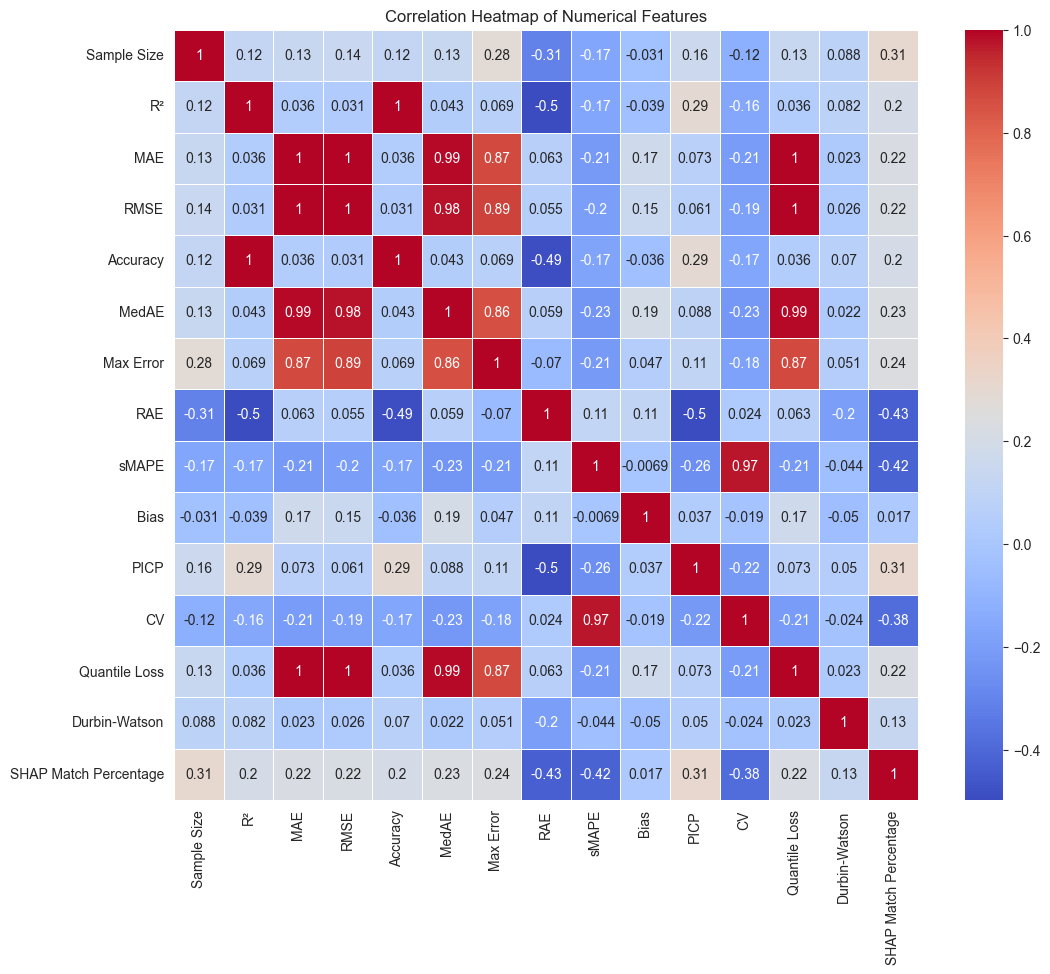

In [39]:
# Correlation heatmap of numerical columns
numeric_columns = experiment_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = experiment_dataset[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [40]:
experiment_dataset = experiment_dataset.drop(['RMSE','MAE','Quantile Loss','Accuracy','CV','Durbin-Watson'], axis=1)

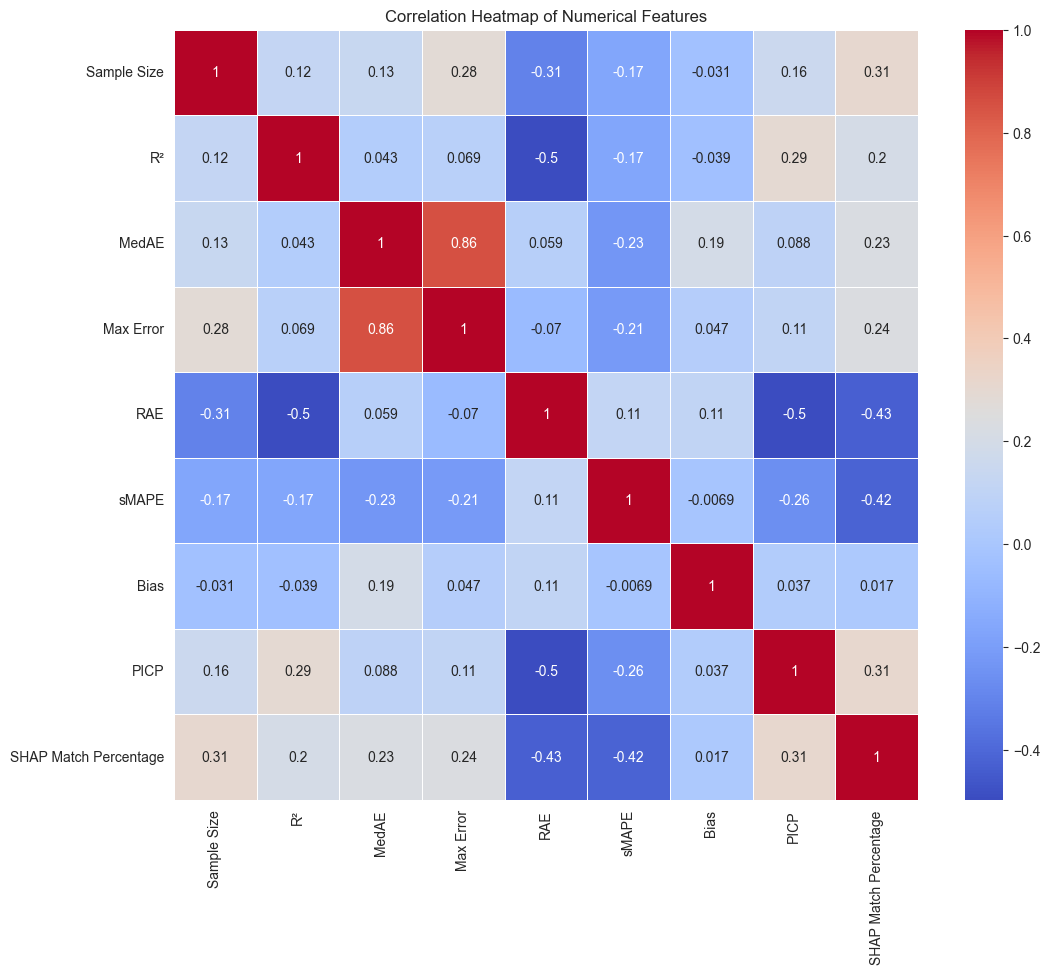

In [41]:
numeric_columns = experiment_dataset.select_dtypes(include=[np.number]).columns
correlation_matrix = experiment_dataset[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

         Sample Size            R²         MedAE      Max Error           RAE  \
count   40000.000000  40000.000000  40000.000000   40000.000000  40000.000000   
mean    18880.000000      0.894899   1768.768432   43548.557966      0.199219   
std     30766.853349      0.258849   4208.255827   90189.183949      0.095147   
min       100.000000    -30.758811      7.034853     115.935425      0.043614   
25%       500.000000      0.882625     27.763123     546.865082      0.152500   
50%      3500.000000      0.921202     40.927807    5417.524902      0.169145   
75%     20000.000000      0.962328     65.871082   14006.573281      0.203421   
max    100000.000000      0.998503  51612.963750  461223.540000      2.036847   

              sMAPE          Bias          PICP  SHAP Match Percentage  
count  40000.000000  40000.000000  40000.000000           40000.000000  
mean      39.619672     74.409395      0.995179              93.778214  
std       33.556166   1272.312966      0.011915    

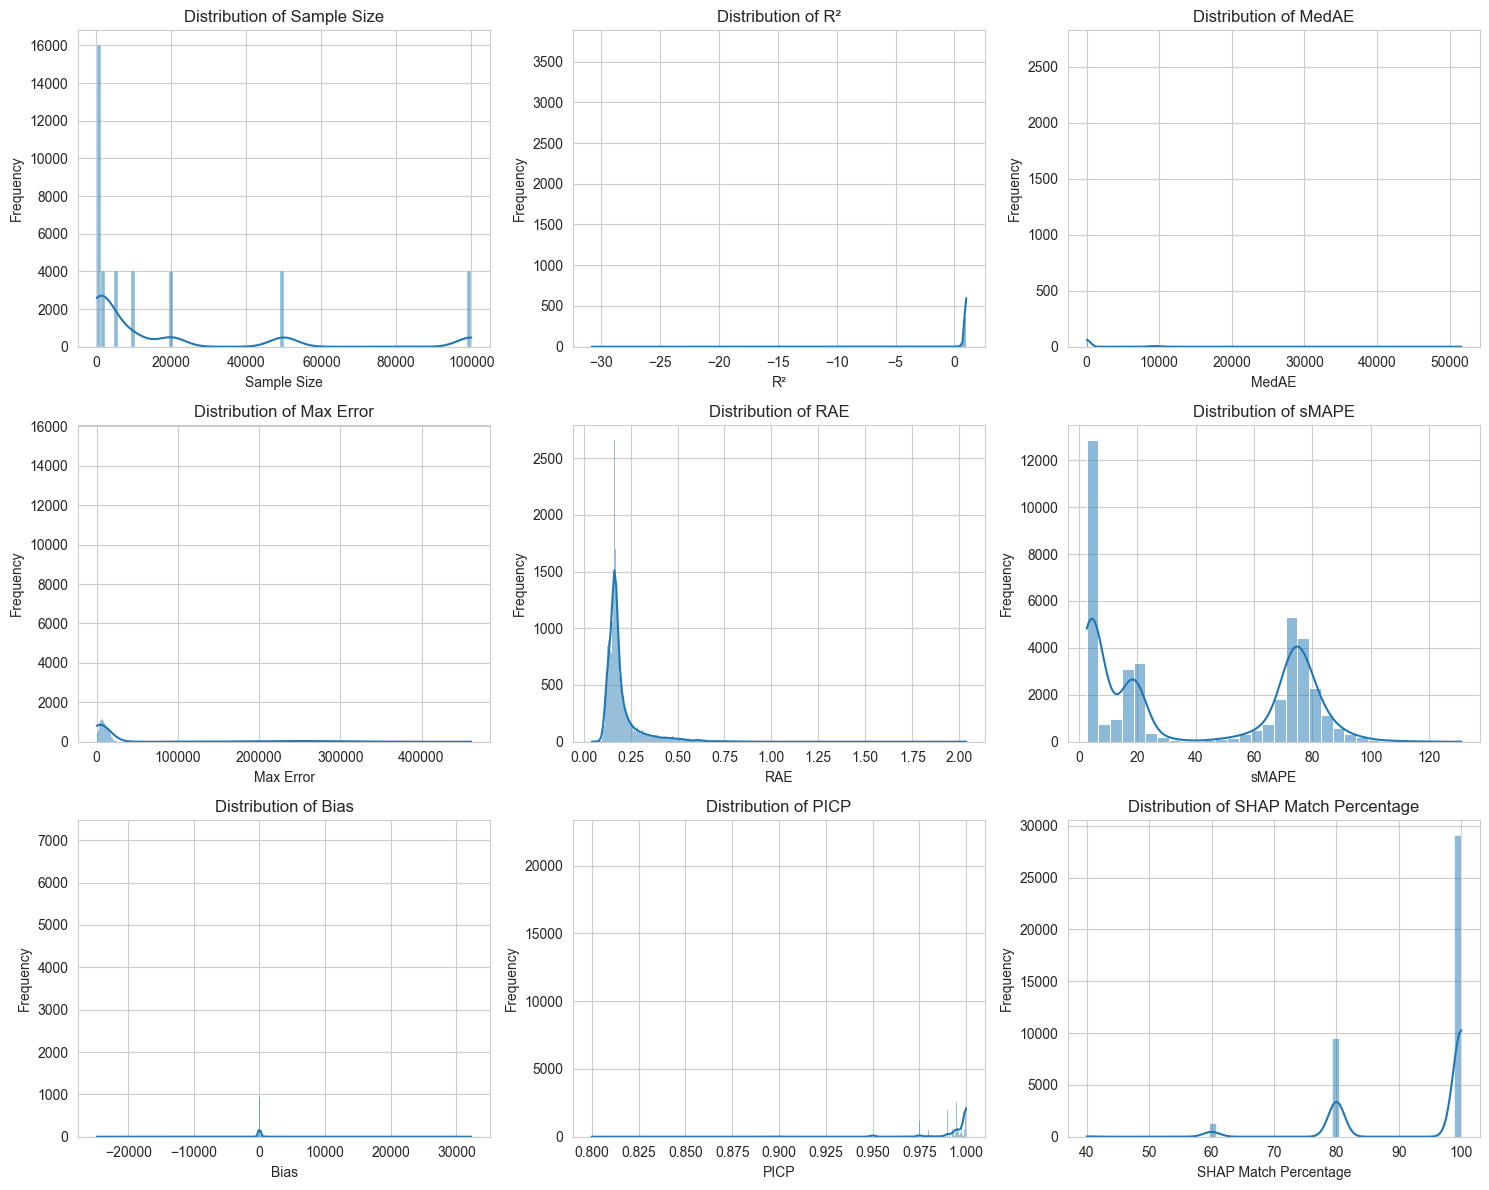

In [42]:
print(experiment_dataset.describe())

numerical_features = experiment_dataset.select_dtypes(include=[np.number]).columns
n_features = len(numerical_features)
n_cols = 3
n_rows = (n_features - 1) // n_cols + 1

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4*n_rows))
axes = axes.flatten()

for i, feature in enumerate(numerical_features):
    sns.histplot(experiment_dataset[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

for i in range(n_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.close()

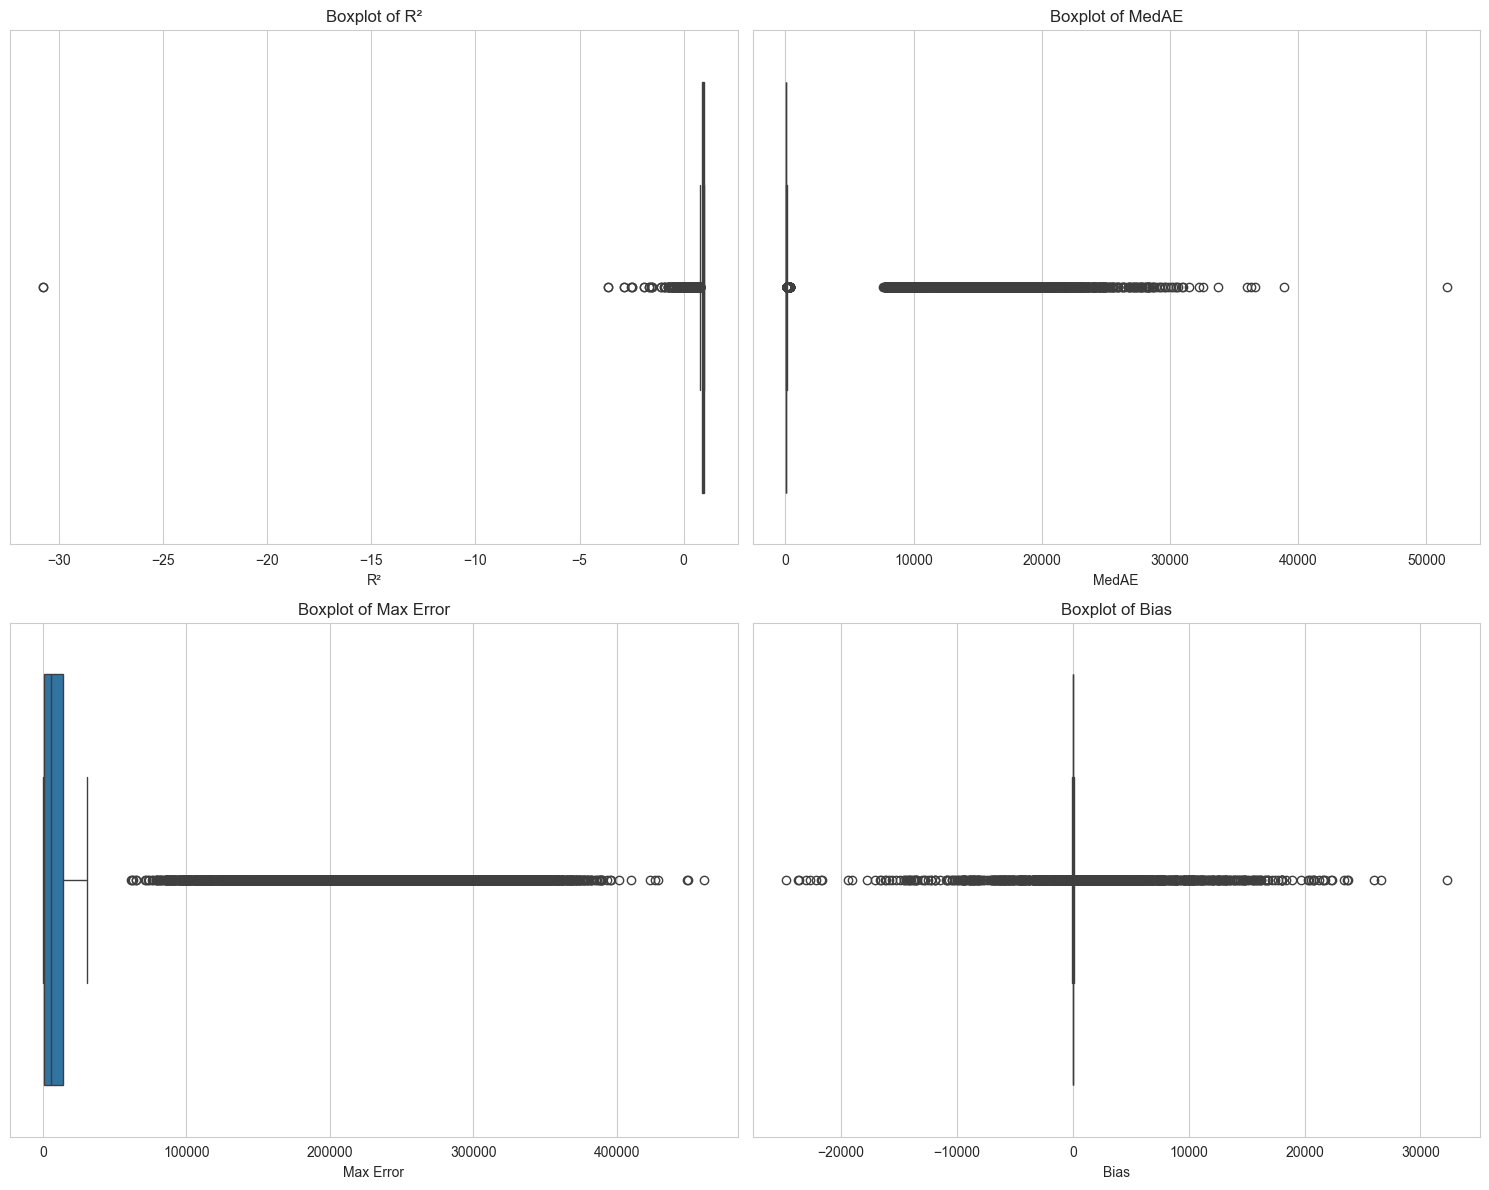

In [46]:
features_to_analyze = ['R²', 'MedAE', 'Max Error', 'Bias']

n_rows = (n_features - 1) // n_cols + 1

fig, axes = plt.subplots(2, 2, figsize=(15, 4*n_rows))

for i, feature in enumerate(features_to_analyze):
    row = i // 2
    col = i % 2
    sns.boxplot(x=experiment_dataset[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {feature}')

plt.tight_layout()
plt.show()
plt.close()

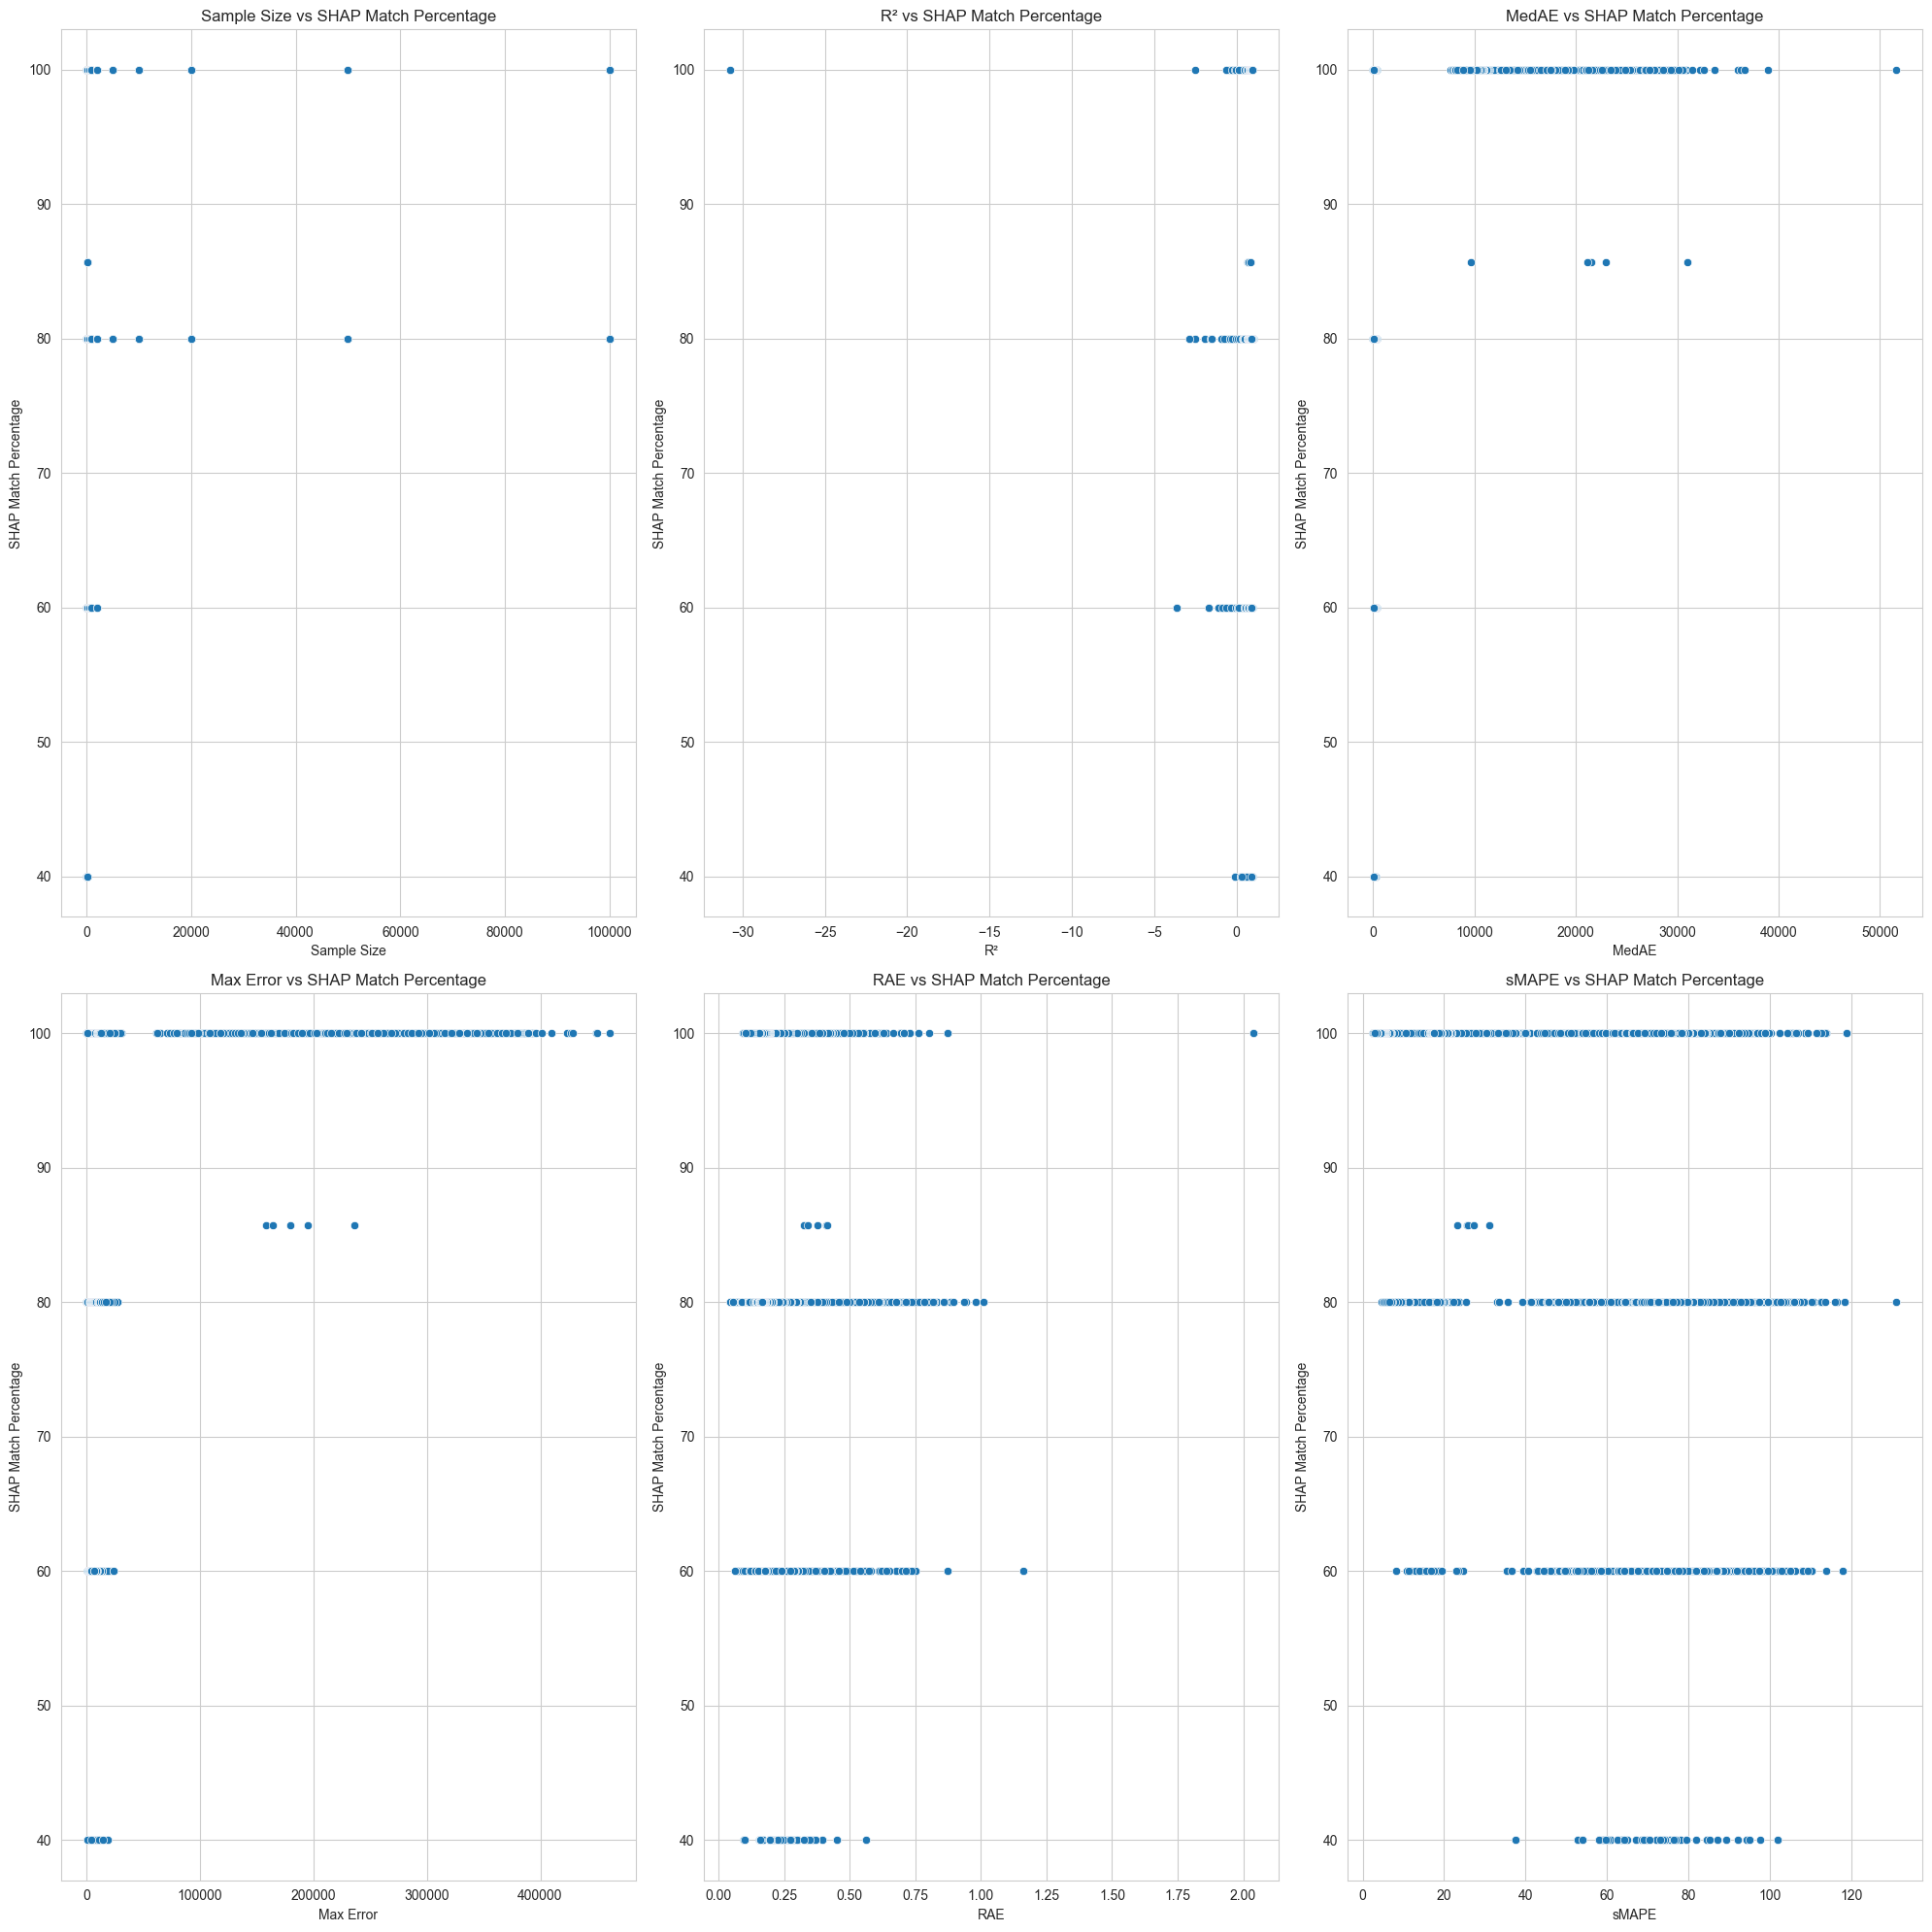

In [48]:

def plot_scatter_with_target(df, features, target):
    n_features = len(features)
    n_cols = 3  # Number of columns
    n_rows = (n_features + n_cols - 1) // n_cols  # Calculate number of rows needed
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10*n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easier indexing
    
    for i, feature in enumerate(features):
        sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
        axes[i].set_title(f'{feature} vs {target}')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel(target)
    
    # Remove any unused subplots
    for j in range(i+1, n_rows*n_cols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    plt.close()

features_to_plot = ['Sample Size', 'R²', 'MedAE', 'Max Error', 'RAE', 'sMAPE']
plot_scatter_with_target(experiment_dataset, features_to_plot, 'SHAP Match Percentage')

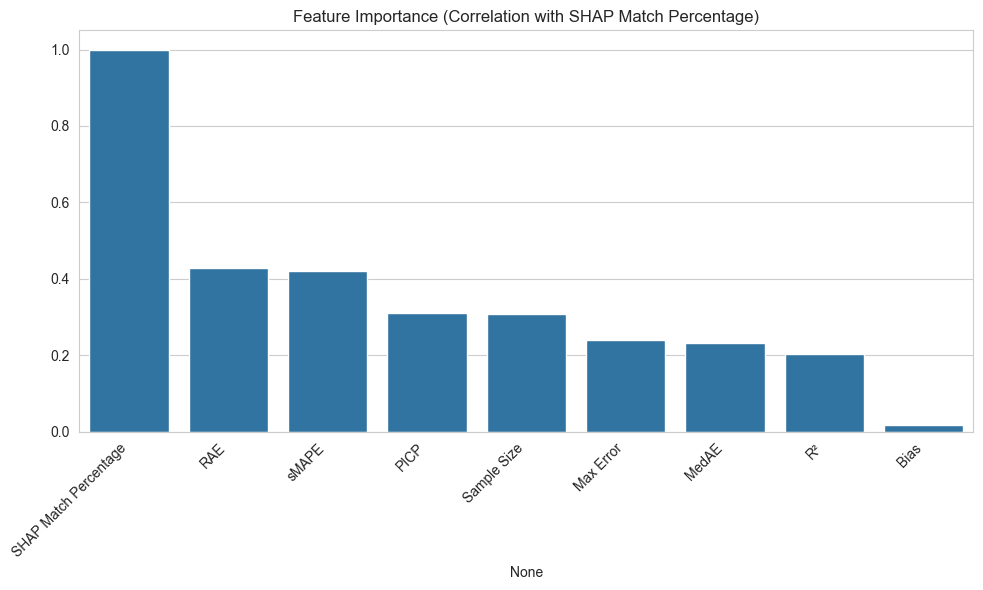

In [49]:
def plot_feature_importance(df, target):
    corr = experiment_dataset.corr()[target].abs().sort_values(ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=corr.index, y=corr.values)
    plt.title(f'Feature Importance (Correlation with {target})')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    plt.close()

plot_feature_importance(experiment_dataset, 'SHAP Match Percentage')

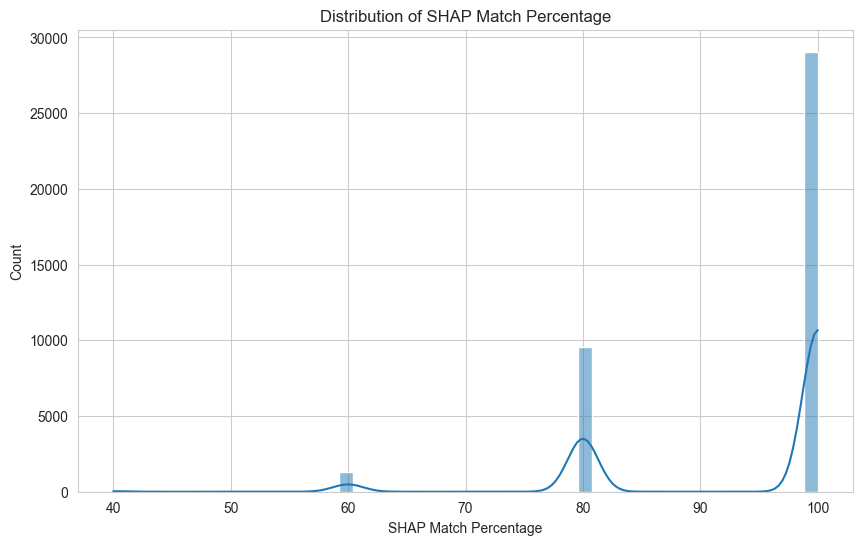

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(experiment_dataset['SHAP Match Percentage'], kde=True, bins=50)
plt.title('Distribution of SHAP Match Percentage')
plt.show()
plt.close()


In [56]:
experiment_dataset.head()

,Sample Size,R²,MedAE,Max Error,RAE,sMAPE,Bias,PICP,SHAP Match Percentage
0,100,0.622305,132.526520,597.525391,0.690923,17.378078,60.486722,0.95,100.0
1,100,0.583058,99.741730,706.476929,0.509408,15.485315,103.733276,0.95,80.0
2,100,0.641704,149.500702,551.696289,0.609772,17.386011,-57.145799,1.00,80.0
3,100,0.767949,86.824554,383.679443,0.480656,13.491869,42.770209,1.00,80.0
4,100,0.740804,136.558289,632.256226,0.491625,13.751135,-23.446216,0.95,100.0


In [57]:
experiment_dataset.to_csv('Experiment_3_filtered_data.csv',index=False)